In [2]:
import pandas as pd
import numpy as np

data = pd.DataFrame([
    [2e5, 5e7, 25e6, 3e9, 3e9],
    [np.nan, 100, 200, 30, 0.33],
    [np.nan, 100, 100, 100, 10000],
    [np.nan, 5e7, 5e7, 1e9, 1e8],
    [0.1, 5.0, 5.0, 100.0, 500.0],
    [0.01, 0.001, 0.001, 0.001, 0.1]], 
    columns=["exon arrays", "WES", "mRNA-seq", "WGS", "nanopore"], 
    index=["#probes", "coverage", "read length", "#reads", "raw size [GB]", "error rate [%]"])
data = data[["WES", "mRNA-seq", "WGS", "nanopore"]]
data.loc["error rate [%]"] *= 100
data = data.stack().reset_index()
data.columns = ["feature", "source", "value"]
data

feature    source         value
0          #probes       WES  5.000000e+07
1          #probes  mRNA-seq  2.500000e+07
2          #probes       WGS  3.000000e+09
3          #probes  nanopore  3.000000e+09
4         coverage       WES  1.000000e+02
5         coverage  mRNA-seq  2.000000e+02
6         coverage       WGS  3.000000e+01
7         coverage  nanopore  3.300000e-01
8      read length       WES  1.000000e+02
9      read length  mRNA-seq  1.000000e+02
10     read length       WGS  1.000000e+02
11     read length  nanopore  1.000000e+04
12          #reads       WES  5.000000e+07
13          #reads  mRNA-seq  5.000000e+07
14          #reads       WGS  1.000000e+09
15          #reads  nanopore  1.000000e+08
16   raw size [GB]       WES  5.000000e+00
17   raw size [GB]  mRNA-seq  5.000000e+00
18   raw size [GB]       WGS  1.000000e+02
19   raw size [GB]  nanopore  5.000000e+02
20  error rate [%]       WES  1.000000e-01
21  error rate [%]  mRNA-seq  1.000000e-01
22  error rate [%]       WGS  1.000000e-01
23  error rate [%]  nanopore  1.000000e+01

In [3]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("sfb876", ["white", "#649600"], 5)
palette = [cmap(i) for i in range(1, 5)]

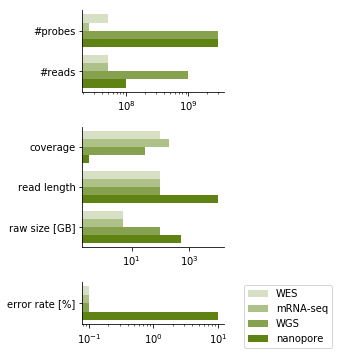

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(5, 5))
spec = gridspec.GridSpec(ncols=1, nrows=9)

i = 0
for features in [["#probes", "#reads"], ["coverage", "raw size [GB]", "read length"], ["error rate [%]"]]:
    fig.add_subplot(spec[i:i+len(features) + 1, 0])
    
    ax = sns.barplot(y="feature", x="value", hue="source", orient="h", data=data[data.feature.isin(features)], palette=palette)
    ax.set_xscale("log")
    plt.xlabel("")
    plt.ylabel("")
    if i < 5:
        ax.get_legend().remove()
    else:
        ax.get_legend().set_title("")
        ax.get_legend().set_bbox_to_anchor((1.1, 1.05))
    i += len(features) + 1
#plt.xticks(rotation=45, ha="right")
sns.despine()
plt.tight_layout()
plt.savefig("technology-characteristics.pdf", bbox_inches="tight")
plt.show()